# 2. Chromosomes segregation modeling

TODO

[G. Gay, T.Courthéoux, C. Reyes, S. Tournier, Y. Gachet. *A stochastic model of kinetochore–microtubule attachment accurately describes fission yeast chromosome segregation J. Cell Biol 2012](http://jcb.rupress.org/content/196/6/757.abstract)

[Mary, H., Fouchard, J., Gay, G., Reyes, C., Gauthier, T., Gruget, C., Pecreaux, J., Tournier, S. and Gachet, Y. (2015). Fission yeast kinesin-8 controls chromosome congression independently of oscillations. J. Cell Sci](http://jcs.biologists.org/content/128/20/3720)

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

from kt_simul.core import Metaphase
from kt_simul.core import load_metaphase
from kt_simul.core import parameters

from kt_simul.visu import SpindleViewer
from kt_simul.visu import SpindleWidget

In [4]:
params = parameters.get_default_params()
params.loc['dt', 'value'] = 0.1
params.loc['span', 'value'] = 10
params.loc['t_A', 'value'] = 10

params.loc['d_alpha', 'value'] = 0.05 # 0.05
params.loc['k_a', 'value'] = 0.06  # 0.06
params.loc['orientation', 'value'] = 1  # 1

params.loc['N', 'value'] = 2  # 3
params.loc['Mk', 'value'] = 1  # 3
params.loc['L0', 'value'] = 0.3  # 0.3

params.loc['ldep', 'value'] = 0  # 0.2

measures = parameters.get_default_measures()

meta = Metaphase(verbose=False,
                 params=params,
                 measures=measures,
                 initial_plug='null',
                 keep_same_random_seed=False,
                 force_parameters=[])

In [6]:
meta.simul(progress=True)
meta.project(progress=True)

Save simulation for later re-use.

In [ ]:
meta.save("/home/hadim/test.h5")

Visualize spindle elements trajectories

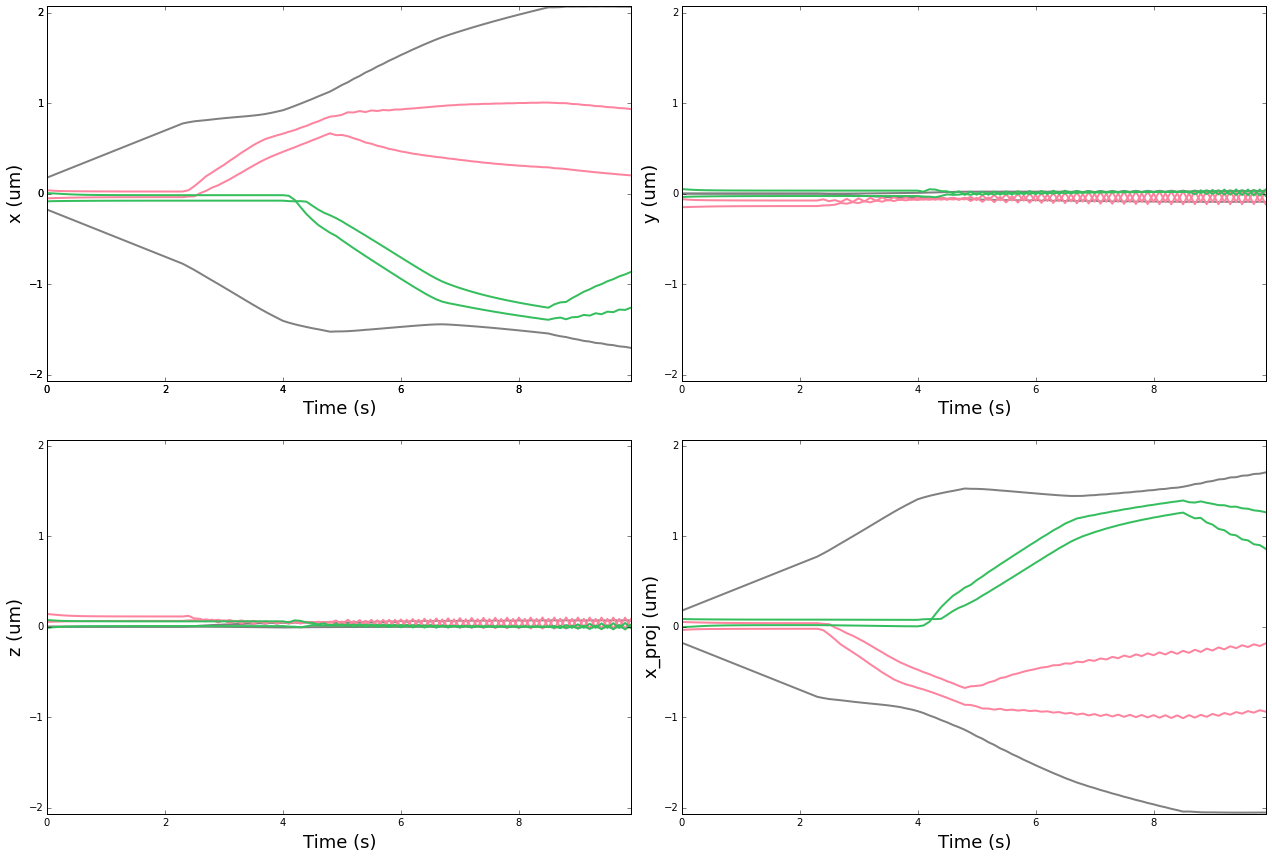

In [7]:
fig = meta.show()

Visualize points trajectories in 3D with vispy.

In [12]:
%matplotlib qt

# Pure vispy
v = SpindleViewer(metaphase=meta)
v.play()

In [9]:
v.quit()

In [10]:
# Vispy + Qt
w = SpindleWidget(metaphase=meta)
w.show()